In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# loading dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train/255 
x_test  = x_test/255 

In [17]:
i = tf.keras.Input((28,28,1))
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(i)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = tf.keras.models.Model(i, decoded)

In [18]:
# model summary
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 7, 7, 8)           584 

In [19]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [20]:
r= autoencoder.fit(
    x=x_train,
    y=x_train,
    epochs=25,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Epoch 1/25
469/469 [==============================] - 12s 8ms/step - loss: 0.2131 - accuracy: 0.7958 - val_loss: 0.1451 - val_accuracy: 0.8003
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1355 - accuracy: 0.8041 - val_loss: 0.1266 - val_accuracy: 0.8042
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1230 - accuracy: 0.8071 - val_loss: 0.1177 - val_accuracy: 0.8077
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1161 - accuracy: 0.8088 - val_loss: 0.1125 - val_accuracy: 0.8091
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1117 - accuracy: 0.8098 - val_loss: 0.1089 - val_accuracy: 0.8096
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1089 - accuracy: 0.8104 - val_loss: 0.1069 - val_accuracy: 0.8102
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1070 - accuracy: 0.8108 - val_loss: 0.1052 - val_accuracy: 0.8100
Epoch

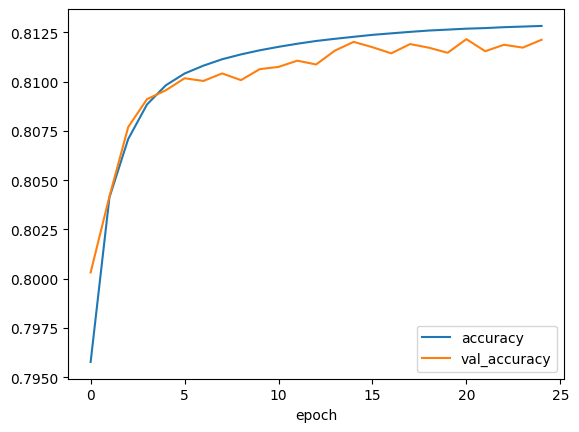

In [21]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

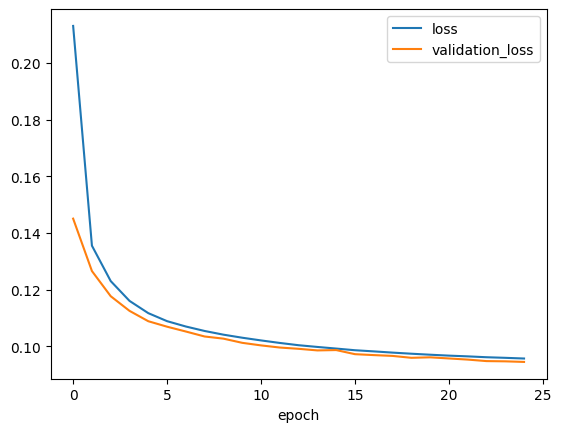

In [22]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation_loss')
plt.xlabel('epoch')
plt.legend()

In [23]:
def make_prediction(idx):
    import numpy as np
    img = np.expand_dims(x_test[idx], axis=-1)[np.newaxis, ...]
    pred = autoencoder.predict(img, verbose=0)
    return np.squeeze(pred)

In [24]:
def plot_img(idx):
    fig, axes = plt.subplots(1, 2, figsize=(3, 3))
    img = x_test[idx]
    prediction = make_prediction(idx)
    axes[0].imshow(prediction, cmap='gray')
    axes[1].imshow(img, cmap='gray')
    axes[0].set_title('generated')
    axes[1].set_title('original')
    axes[0].axis('off')
    axes[1].axis('off')

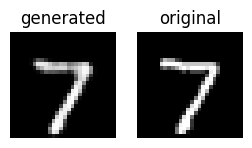

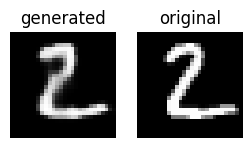

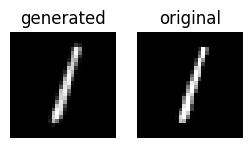

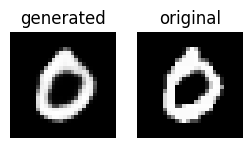

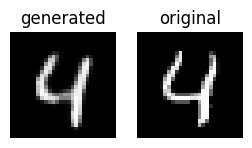

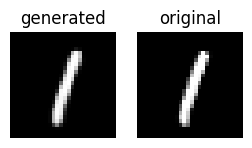

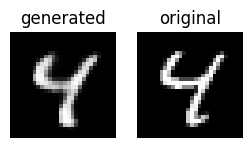

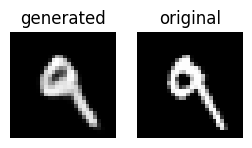

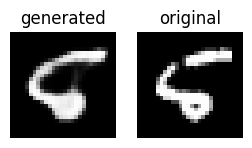

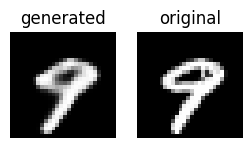

In [25]:
for i in range(10):
    plot_img(i)

In [26]:
autoencoder.save("mnist_reconstruction_AE.h5")